# SuperReso

### Super Resolution without stupid ML

In [1]:
# Import Libraries
import cv2
import numpy as np
from scipy import ndimage
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Load in blurry sample image as well as target image
target_raspberry = cv2.imread('target.jpg')
sample_raspberry = cv2.blur(cv2.imread('raspberries.png'), (15,15)) # For now, we will use the blurred raspberry image as our sample

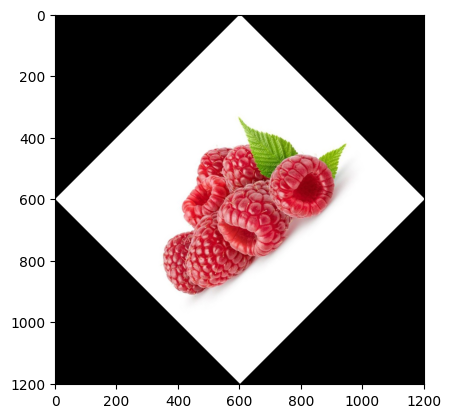

In [3]:
rotated = ndimage.rotate(target_raspberry, 45)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

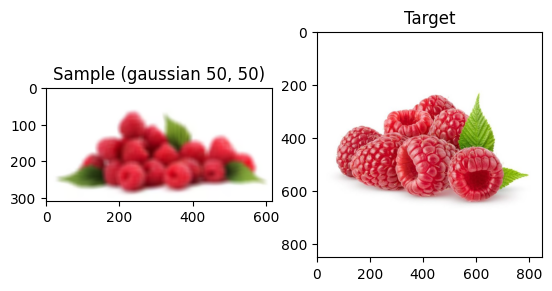

In [4]:
f, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(sample_raspberry, cv2.COLOR_BGR2RGB))
ax[0].title.set_text("Sample (gaussian 50, 50)")
ax[1].imshow(cv2.cvtColor(target_raspberry, cv2.COLOR_BGR2RGB))
ax[1].title.set_text("Target")

plt.show()

(309, 616, 3)


100%|█████████████████████████████████████████████| 9/9 [01:00<00:00,  6.72s/it]

(309, 616, 3)


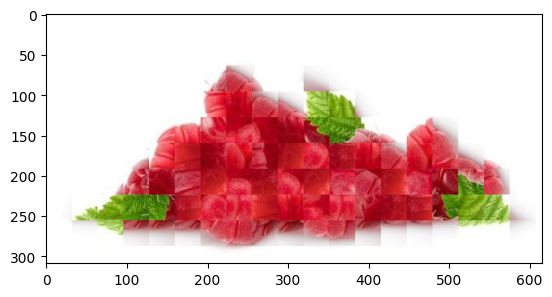

In [6]:
# Then parse through each 32 x 32 pixel patch
print(sample_raspberry.shape)
width, height, _ = sample_raspberry.shape
output_image = sample_raspberry.copy()
targets = []
for deg in range(0, 180, 30):
    targets.append(ndimage.rotate(target_raspberry, deg))

PATCH_SIZE = 32

for i in tqdm(range(0, width-PATCH_SIZE, PATCH_SIZE)):
    for j in range(0, height-PATCH_SIZE, PATCH_SIZE):
        patch = sample_raspberry[i:i+PATCH_SIZE, j:j+PATCH_SIZE, :]
#         plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
#         plt.show()
        # For each patch, look for nearest match with the target image
        best_val = float('inf')
        for target in targets:
            res = cv2.matchTemplate(target, patch, cv2.TM_SQDIFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            if min_val < best_val:
                best_val = min_val
                best_patch = target[min_loc[1]:min_loc[1]+PATCH_SIZE, min_loc[0]:min_loc[0]+PATCH_SIZE, :]
#         plt.imshow(cv2.cvtColor(best_patch, cv2.COLOR_BGR2RGB), cmap = 'gray')
#         plt.show()

        # Then replace that patch with the nearest match
        output_image[i:i+PATCH_SIZE, j:j+PATCH_SIZE, :] = best_patch
#         break
#     break

# Display output image
print(output_image.shape)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))